<a href="https://colab.research.google.com/github/ericjeab/Data-Science-Fundamentals/blob/main/CodingTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CT-1.1 Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points]

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/dsf/CCD-Data.csv'

import pandas as pd

df = pd.read_csv(path, delimiter=',', header =0)

df.to_csv("new_CCD.txt",header = False, sep=' ', index=False)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0.1,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,0,2018-10-25 10:32:04.789000,1540456324789,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,1,2018-10-25 10:32:04.878000,1540456324878,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2,2018-10-25 10:32:04.962000,1540456324962,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,3,2018-10-25 10:32:05.046000,1540456325046,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,4,2018-10-25 10:32:05.129000,1540456325129,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900


CT-1.2 Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm.


In [11]:
import numpy as np

#This will create a dictionary with key as new columns(one per 1nm) and as values the nm in between.
new_dict = {}
for i in range(3,len(df.columns)):
  key = round(float(df.columns[i]),-1)
  if key not in new_dict:
    new_dict[key] = [df.columns[i]]
  elif key in new_dict:
    new_dict[key].append(df.columns[i])
merged_df = pd.DataFrame()
series_list = []
for key,value in new_dict.items():
    average_series = df[new_dict[key]].mean(axis=1)
    series_list.append(average_series)

merged_df = pd.concat(series_list, axis=1)
merged_df.columns = new_dict.keys()
merged_df.head()




,320.0,330.0,340.0,350.0,360.0,370.0,380.0,390.0,400.0,410.0,...,690.0,700.0,710.0,720.0,730.0,740.0,750.0,760.0,770.0,780.0
0,0.000439,0.045837,0.058022,0.190212,0.335453,0.313744,0.419237,0.621383,0.989292,1.244875,...,-0.045186,-0.043953,-0.043334,-0.044869,-0.043133,-0.040912,-0.039963,-0.040365,-0.039183,-0.037875
1,0.338387,-0.013348,0.187475,0.589657,0.440922,0.431555,0.466150,0.654961,1.032161,1.304736,...,-0.045277,-0.043974,-0.043460,-0.045058,-0.043192,-0.041000,-0.040234,-0.040563,-0.039195,-0.038035
2,-0.063978,0.064275,0.140733,0.275776,0.426530,0.407223,0.463081,0.662098,1.050245,1.306476,...,-0.045222,-0.043999,-0.043494,-0.045170,-0.043116,-0.041137,-0.040124,-0.040856,-0.039170,-0.037488
3,0.050078,0.047621,0.042353,0.239687,0.334013,0.338644,0.418989,0.628896,1.002499,1.284831,...,-0.044633,-0.043345,-0.042757,-0.044679,-0.042493,-0.040452,-0.039553,-0.039901,-0.038534,-0.037215
4,-0.008990,0.057733,0.145002,0.171267,0.324252,0.306096,0.396790,0.619874,0.975444,1.243719,...,-0.045130,-0.043560,-0.043118,-0.044897,-0.043003,-0.040655,-0.039917,-0.040320,-0.039018,-0.037836


CT-1.3 Now generalize the above merging so that it works for any number nm er column. [2.0 points]

Use the code above, just edit *round()*, to desired output and you get a generalized merging.

CT-1.4 Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]

In [ ]:
#CT-1.4 (1)
%%time

with open('output.csv', 'w') as file:
    for index, row in merged_df.iterrows():
        file.write(','.join(map(str, row.values)) + '\n')


CPU times: user 31.9 ms, sys: 4.13 ms, total: 36 ms
Wall time: 37.1 ms


In [ ]:
%%time
merged_df.to_csv('output.csv', index=False)

CPU times: user 43.3 ms, sys: 3.87 ms, total: 47.1 ms
Wall time: 55.9 ms


CT-1.5 Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points]

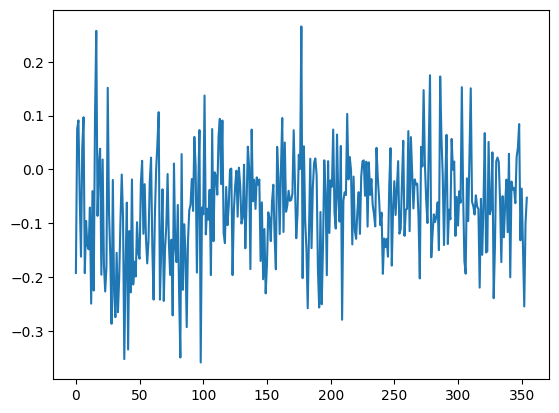

In [4]:
import matplotlib.pyplot as plt

x= df.iloc[:,0]
y= df.iloc[:,390]-df.iloc[:,450]
plt.plot(x,y)

CT-1.6 Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file.

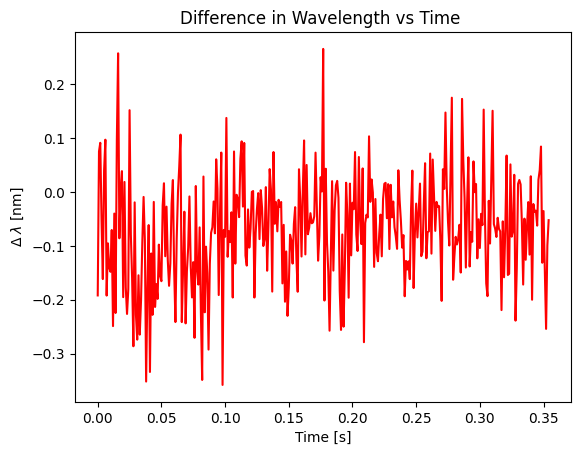

In [ ]:
x= df.iloc[:,0]/1000
y= df.iloc[:,390]-df.iloc[:,450]
plt.plot(x,y, c='r', label='line')
plt.xlabel('Time [s]')
plt.ylabel('$\Delta$ $\lambda$ [nm]')
plt.title('Difference in Wavelength vs Time ')
plt.savefig('wavelengthdifference.png')

CT-1.7 Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

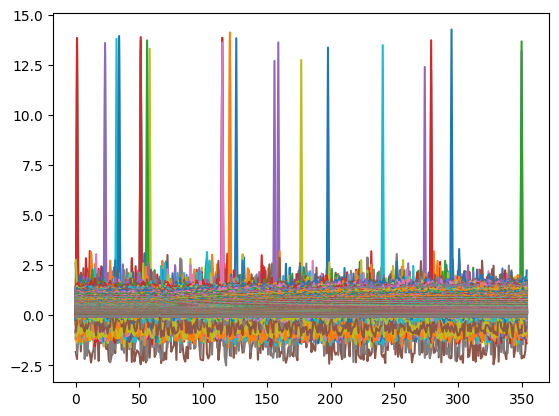

In [24]:
for i in range(3,len(df.columns)):
  plt.plot(df.iloc[:,0],df.iloc[:,i])


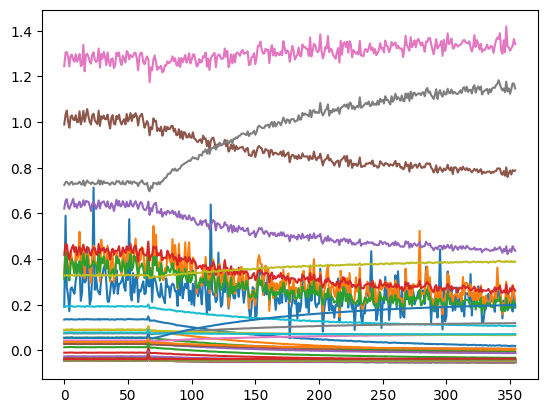

In [23]:
for i in range(3,len(merged_df.columns)):
  plt.plot(df.iloc[:,0],merged_df.iloc[:,i])